This file conrtains parts Section 2 , 3 DA and 4 ML python codes

# Data Analysis Approach Implimentation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#DATA PREPROCESSING
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
dfi = pd.read_csv('credit_card.csv')
df = dfi.drop('Ind_ID', axis=1)
# Display the first few rows of the dataset
print(df.head())

# Separate features (X) and target variable (y)
X = df.drop('label', axis=1)
y = df['label']

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


  GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0      M         Y             Y         0       180000.0   
1      F         Y             N         0       315000.0   
2      F         Y             N         0       315000.0   
3      F         Y             N         0            NaN   
4      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   


          CHILDREN  Annual_income  Birthday_count  Employed_days  \
count  1548.000000   1.525000e+03     1526.000000    1548.000000   
mean      0.412791   1.913993e+05   -16040.342071   59364.689922   
std       0.776691   1.132530e+05     4229.503202  137808.062701   
min       0.000000   3.375000e+04   -24946.000000  -14887.000000   
25%       0.000000   1.215000e+05   -19553.000000   -3174.500000   
50%       0.000000   1.665000e+05   -15661.500000   -1565.000000   
75%       1.000000   2.250000e+05   -12417.000000    -431.750000   
max      14.000000   1.575000e+06    -7705.000000  365243.000000   

       Mobile_phone   Work_Phone        Phone     EMAIL_ID  Family_Members  \
count        1548.0  1548.000000  1548.000000  1548.000000     1548.000000   
mean            1.0     0.208010     0.309432     0.092377        2.161499   
std             0.0     0.406015     0.462409     0.289651        0.947772   
min             1.0     0.000000     0.000000     0.000000        1.000000 

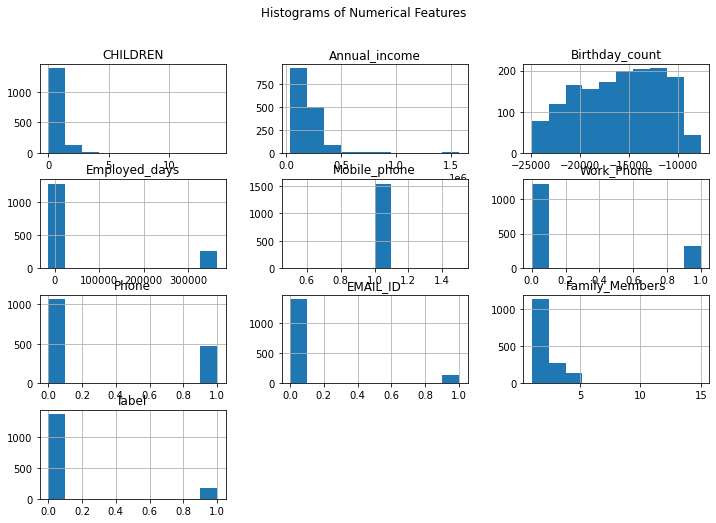

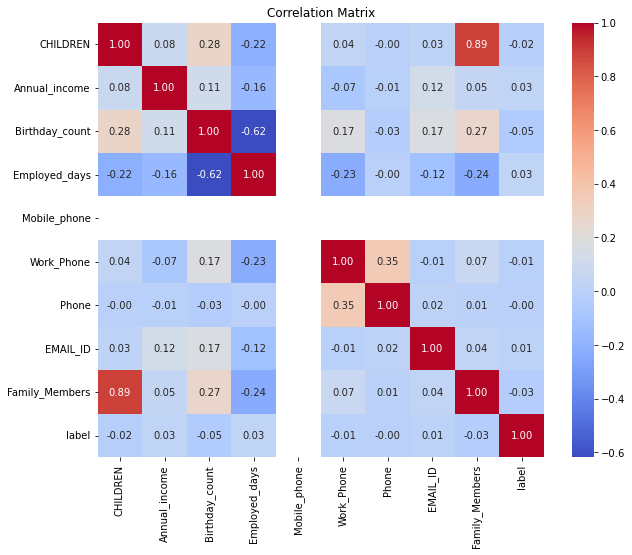

In [3]:
#EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('credit_card.csv')

# Display statistical summaries
print(df.describe())

# Visualize histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[numerical_features].hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Machine Learning Aproach implimentation

In [4]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
#df = pd.read_csv('credit_card.csv')

# Separate features (X) and target variable (y)
#X = df.drop('label', axis=1)
#y = df['label']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)


Training Naive Bayes...
Naive Bayes Accuracy: 0.1387
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09       280
           1       0.10      1.00      0.18        30

    accuracy                           0.14       310
   macro avg       0.55      0.52      0.14       310
weighted avg       0.91      0.14      0.10       310

Training Logistic Regression...
Logistic Regression Accuracy: 0.9032
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       280
           1       0.00      0.00      0.00        30

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.82      0.90      0.86       310

Training Support Vector Machine...
Support Vector Machine Accuracy: 0.9032
Support Vector Machine Classification Report:
              precision  

In [5]:
#SECTION 4: Q3 INCREASING ACCURACY
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for each model
param_grid = {
    'Naive Bayes': {},  # No hyperparameters to tune for Naive Bayes
    'Logistic Regression': {'C': [0.1, 1, 10, 100]},  # Regularization parameter
    'Support Vector Machine': {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},  # Regularization and kernel parameters
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]},  # Number of trees and max depth
    'Decision Tree': {'max_depth': [None, 10, 20, 30]}  # Max depth of the tree
}

# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate models with grid search
for name, model in models.items():
    print(f"Training {name}...")
    # Perform grid search for the current model
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best model after grid search
    best_model = grid_search.best_estimator_
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best {name} Accuracy: {accuracy:.4f}")
    print(f"Best {name} Parameters: {grid_search.best_params_}")
    print(f"Best {name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)


Training Naive Bayes...
Best Naive Bayes Accuracy: 0.1387
Best Naive Bayes Parameters: {}
Best Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09       280
           1       0.10      1.00      0.18        30

    accuracy                           0.14       310
   macro avg       0.55      0.52      0.14       310
weighted avg       0.91      0.14      0.10       310

Training Logistic Regression...
Best Logistic Regression Accuracy: 0.9000
Best Logistic Regression Parameters: {'C': 10}
Best Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       280
           1       0.33      0.03      0.06        30

    accuracy                           0.90       310
   macro avg       0.62      0.51      0.50       310
weighted avg       0.85      0.90      0.86       310

Training Support Vector Machine...
Best Support